In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = 150
BATCH_SIZE = 32
NUM_CLASSES = 10  # Adjusted to 10 based on the actual number of classes in your training dataset

# Data directories (update these paths if needed)
train_dir = '/content/drive/MyDrive/AI/Projeto_AI/train'
validation_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5'
test_dir = '/content/drive/MyDrive/AI/Projeto_AI/test'

# Function to resize images
def resize_image(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label

# Load datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
).map(resize_image)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
).map(resize_image)

test_dataset = image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
).map(resize_image)

# Build the model
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')  # Change the number of neurons to 10
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Function to predict class of images in a batch
def predict_images(images):
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    return predicted_classes.numpy()

# Fetch and classify the first five images from the train dataset
for data_batch, labels_batch in train_dataset.take(1):
    # Predict the classes for the first five images
    predicted_classes = predict_images(data_batch[:5])
    
    # Class names (update with your actual class names)
    class_names = [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]  # Replace with your actual class names
    
    # Plot the images with their predicted class names
    plt.figure(figsize=(10, 10))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_classes[i]])
        plt.axis('off')
    plt.show()


Image directories

In [3]:
import os, shutil
train_dir = '/content/drive/MyDrive/AI/Projeto_AI/train'
validation_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5'
test_dir = '/content/drive/MyDrive/AI/Projeto_AI/test'
#Caminhos de treino
train_airplane1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/000_airplane/'
train_airplane2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/000_airplane/'
train_airplane3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/000_airplane/'
train_airplane4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/000_airplane/ '

train_automobile1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/001_automobile/'
train_automobile2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/001_automobile/'
train_automobile3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/001_automobile/'
train_automobile4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/001_automobile/'

train_bird1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/002_bird/'
train_bird2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/002_bird/'
train_bird3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/002_bird/'
train_bird4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/002_bird/'

train_cat1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/003_cat/'
train_cat2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/003_cat/'
train_cat3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/003_cat/'
train_cat4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/003_cat/'

train_deer1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/004_deer/'
train_deer2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/004_deer/'
train_deer3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/004_deer/'
train_deer4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/004_deer/'

train_dog1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/005_dog/'
train_dog2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/005_dog/'
train_dog3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/005_dog/'
train_dog4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/005_dog/'

train_frog1_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/006_frog/'
train_frog2_dir = '/content/drive/MyDrive/AI/Projeto_AI/train2/006_frog/'
train_frog3_dir = '/content/drive/MyDrive/AI/Projeto_AI/train3/006_frog/'
train_frog4_dir = '/content/drive/MyDrive/AI/Projeto_AI/train4/006_frog/'

train_horse1_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/007_horse/'
train_horse2_dir ='/content/drive/MyDrive/AI/Projeto_AI/train2/007_horse/'
train_horse3_dir ='/content/drive/MyDrive/AI/Projeto_AI/train3/007_horse/'
train_horse4_dir ='/content/drive/MyDrive/AI/Projeto_AI/train4/007_horse/'

train_ship1_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/008_ship/'
train_ship2_dir ='/content/drive/MyDrive/AI/Projeto_AI/train2/008_ship/'
train_ship3_dir ='/content/drive/MyDrive/AI/Projeto_AI/train3/008_ship/'
train_ship4_dir ='/content/drive/MyDrive/AI/Projeto_AI/train4/008_ship/'

train_truck1_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/009_truck/'
train_truck2_dir ='/content/drive/MyDrive/AI/Projeto_AI/train2/009_truck/'
train_truck3_dir ='/content/drive/MyDrive/AI/Projeto_AI/train3/009_truck/'
train_truck4_dir ='/content/drive/MyDrive/AI/Projeto_AI/train4/009_truck/'
#--------------------------------------------------------------------------------
#Caminho de Validações

val_airplane_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/000_airplane/'
val_automobile_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/001_automobile/'
val_bird_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/002_bird/'
val_cat_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/003_cat/'
val_deer_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/004_deer/'
val_dog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/005_dog/'
val_frog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train5/006_frog/'
val_horse_dir ='/content/drive/MyDrive/AI/Projeto_AI/train5/007_horse/'
val_ship_dir ='/content/drive/MyDrive/AI/Projeto_AI/train5/008_ship/'
val_truck_dir ='/content/drive/MyDrive/AI/Projeto_AI/train5/009_truck/'
#-------------------------------------------------------------------------------
#Caminho de testes


test_airplane_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/000_airplane/'
test_automobile_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/001_automobile/'
test_bird_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/002_bird/'
test_cat_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/003_cat/'
test_deer_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/004_deer/'
test_dog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/005_dog/'
test_frog_dir = '/content/drive/MyDrive/AI/Projeto_AI/train1/006_frog/'
test_horse_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/007_horse/'
test_ship_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/008_ship/'
test_truck_dir ='/content/drive/MyDrive/AI/Projeto_AI/train1/009_truck/'
#-------------------------------------------------------------------------------------
#Numero de Treinos

print('total training airplanes images:', len(os.listdir(train_airplane1_dir)) + len(os.listdir(train_airplane2_dir)) + len(os.listdir(train_airplane3_dir)) + len(os.listdir(train_airplane4_dir)))
print('total training automobiles images:', len(os.listdir(train_automobile1_dir)) + len(os.listdir(train_automobile2_dir)) + len(os.listdir(train_automobile3_dir)) + len(os.listdir(train_automobile4_dir)))
print('total training birds images:', len(os.listdir(train_bird1_dir)) + len(os.listdir(train_bird2_dir)) + len(os.listdir(train_bird3_dir)) + len(os.listdir(train_bird4_dir)))
print('total training cats images:', len(os.listdir(train_cat1_dir)) + len(os.listdir(train_cat2_dir)) + len(os.listdir(train_cat3_dir)) + len(os.listdir(train_cat4_dir)))
print('total training deers images:', len(os.listdir(train_deer1_dir)) + len(os.listdir(train_deer2_dir)) + len(os.listdir(train_deer3_dir)) + len(os.listdir(train_deer4_dir)))
print('total training dogs images:', len(os.listdir(train_dog1_dir)) + len(os.listdir(train_dog2_dir)) + len(os.listdir(train_dog3_dir)) + len(os.listdir(train_dog4_dir)))
print('total training frogs images:', len(os.listdir(train_frog1_dir)) + len(os.listdir(train_frog2_dir)) + len(os.listdir(train_frog3_dir)) + len(os.listdir(train_frog4_dir)))
print('total training horses images:', len(os.listdir(train_horse1_dir)) + len(os.listdir(train_horse2_dir)) + len(os.listdir(train_horse3_dir)) + len(os.listdir(train_horse4_dir)))
print('total training ships images:', len(os.listdir(train_ship1_dir)) + len(os.listdir(train_ship2_dir)) + len(os.listdir(train_ship3_dir)) + len(os.listdir(train_ship4_dir)))
print('total training trucks images:', len(os.listdir(train_truck1_dir)) + len(os.listdir(train_truck2_dir)) + len(os.listdir(train_truck3_dir)) + len(os.listdir(train_truck4_dir)))


#---------------------------------------------------------------------------------
#Numero de validações

print('total validation airplanes images:', len(os.listdir(val_airplane_dir)))
print('total validation automobiles images:', len(os.listdir(val_automobile_dir)))
print('total validation birds images:', len(os.listdir(val_bird_dir)))
print('total validation cats images:', len(os.listdir(val_cat_dir)))
print('total validation deers images:', len(os.listdir(val_deer_dir)))
print('total validation dogs images:', len(os.listdir(val_dog_dir)))
print('total validation frogs images:', len(os.listdir(val_frog_dir)))
print('total validation horses images:', len(os.listdir(val_horse_dir)))
print('total validation ships images:', len(os.listdir(val_ship_dir)))
print('total validation trucks images:', len(os.listdir(val_truck_dir)))
#----------------------------------------------------------------------------------
#Numero de testes

print('total testing airplanes images:', len(os.listdir(test_airplane_dir)))
print('total testing automobiles images:', len(os.listdir(test_automobile_dir)))
print('total testing birds images:', len(os.listdir(test_bird_dir)))
print('total testing cats images:', len(os.listdir(test_cat_dir)))
print('total testing deers images:', len(os.listdir(test_deer_dir)))
print('total testing dogs images:', len(os.listdir(test_dog_dir)))
print('total testing frogs images:', len(os.listdir(test_frog_dir)))
print('total testing horses images:', len(os.listdir(test_horse_dir)))
print('total testing ships images:', len(os.listdir(test_ship_dir)))
print('total testing trucks images:', len(os.listdir(test_truck_dir)))



total training airplanes images: 3986
total training automobiles images: 3986
total training birds images: 4048
total training cats images: 3984
total training deers images: 4003
total training dogs images: 3975
total training frogs images: 4020
total training horses images: 4023
total training ships images: 3997
total training trucks images: 3978
total validation airplanes images: 1014
total validation automobiles images: 1014
total validation birds images: 952
total validation cats images: 1016
total validation deers images: 997
total validation dogs images: 1025
total validation frogs images: 980
total validation horses images: 977
total validation ships images: 1003
total validation trucks images: 1022
total testing airplanes images: 1005
total testing automobiles images: 974
total testing birds images: 1032
total testing cats images: 1016
total testing deers images: 999
total testing dogs images: 937
total testing frogs images: 1030
total testing horses images: 1001
total testing 

Pre Processamento data

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150

# Function to resize images
def resize_image(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label


train_dataset = image_dataset_from_directory(
train_dir,
batch_size=32,
label_mode='categorical'
).map(resize_image)
validation_dataset = image_dataset_from_directory(
validation_dir,
batch_size=32,
label_mode='categorical'
).map(resize_image)
test_dataset = image_dataset_from_directory(
test_dir,
batch_size=32,
label_mode='categorical'
).map(resize_image)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [5]:
for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 10)


Mostra imagens

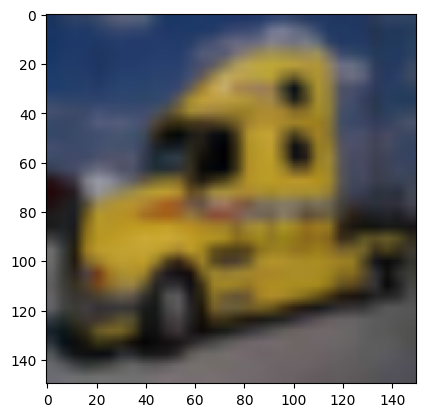

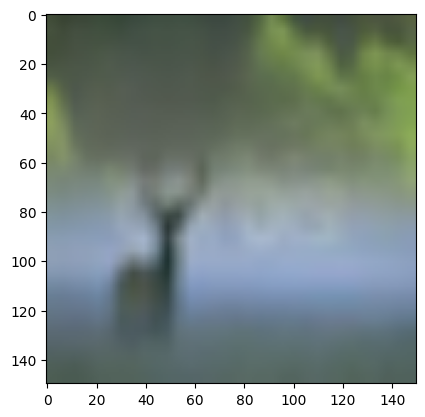

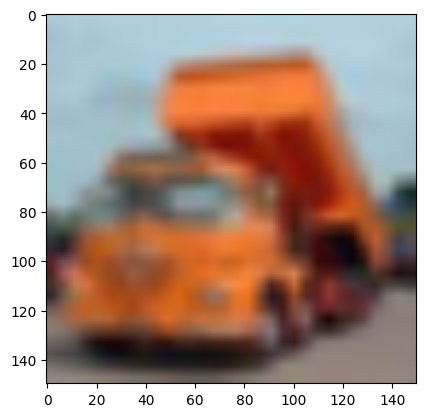

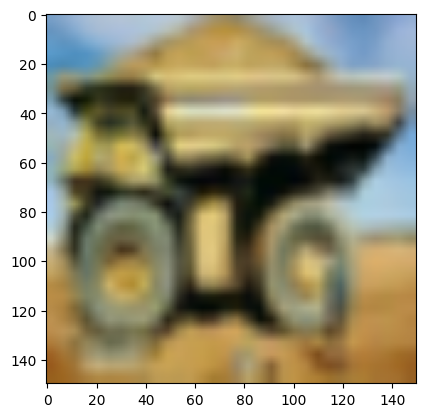

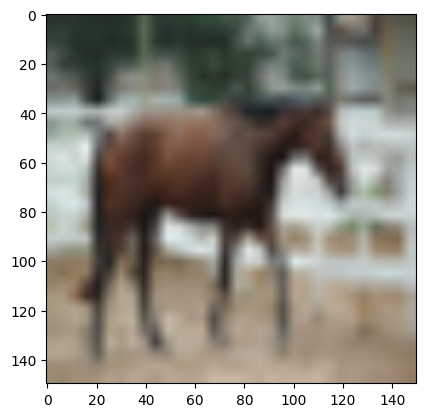

In [6]:
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

Cria o modelo neuronal

In [7]:
#tava aqui o
"""
      NUM_CLASSES = 10
      inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

      # Define the model
      model = Sequential([
      # Example layers
      Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
      Dense(128, activation='relu'),
      Dense(NUM_CLASSES, activation='softmax')  # Ensure the correct number of units and softmax activation
      ])

"""



"\n      NUM_CLASSES = 10\n      inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))\n\n      # Define the model\n      model = Sequential([\n      # Example layers\n      Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),\n      Dense(128, activation='relu'),\n      Dense(NUM_CLASSES, activation='softmax')  # Ensure the correct number of units and softmax activation\n      ])\n\n"

Compila a rede neuronal

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras import layers
from keras import models
from os.path import exists
file_path = '/content/drive/My Drive/AI/Projeto_AI/Projeto_AI.h5'

if exists(file_path):
  try:
      model = keras.models.load_model('/content/drive/MyDrive/AI/Projeto_AI/Projeto_AI.h5')
      print("Model loaded successfully.")
  except Exception as e:
      print(f"Error loading the model: {e}")
else:
      # If the model does not exist, train a new model
      print("Model file not found. Training a new model.")

      NUM_CLASSES = 10
      inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

      # Define the model
      model = Sequential([


      # Example layers
      Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
      Dense(128, activation='relu'),
      Dense(NUM_CLASSES, activation='sigmoid')
      ])

      model.compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-8-d14d943f9472>, line 26)

Treina o modelo

In [ ]:
history = model.fit(
train_dataset,
epochs=10,
validation_data=validation_dataset)

In [ ]:
from tensorflow import keras
model.save("/content/drive/MyDrive/AI/Projeto_AI/Projeto_AI.h5")
print("Saved model to disk")

#--------------------------
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

Mostra o grafico do progresso

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()